In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_798.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2592.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_318.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_207.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2248.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2733.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2791.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2393.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_106.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_2986.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_707.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_756.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Demented/non_1199.jpg
/kaggle/input/augmented-dataset/augmented_data/Non_Dement

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#   DataGenerator to read images and rescale images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
# noinspection PyUnresolvedReferences
import tensorflow.keras as tk
# noinspection PyUnresolvedReferences
import tensorflow.keras.layers as l
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
# noinspection PyUnresolvedReferences
from tensorflow.keras.backend import clear_session
# noinspection PyUnresolvedReferences
from tensorflow.keras.models import clone_model
# noinspection PyUnresolvedReferences
from tensorflow.keras.utils import to_categorical

2024-05-07 06:21:20.395366: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 06:21:20.395510: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 06:21:20.523231: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

In [4]:
## Set Path Here before running the code
WORKING_DIRECTORY =  "/kaggle/input/augmented-dataset/augmented_data"

##  Name of classes
CLASSES = ['Mild_Demented',
           'Moderate_Demented',
           'Non_Demented',
           'Very_Mild_Demented']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image data generator for loading and augmenting images
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images by resizing and shuffling randomly
train_dataset = datagen.flow_from_directory(WORKING_DIRECTORY, target_size=(150, 150), batch_size=64)

# Initialize empty lists to store batches of data
X_batches = []
y_batches = []

# Iterate over the dataset generator to get batches of data
for i in range(len(train_dataset)):
    X_batch, y_batch = train_dataset[i]
    X_batches.append(X_batch)
    y_batches.append(y_batch)

# Concatenate batches to get the entire dataset
X = np.concatenate(X_batches, axis=0)
y = np.concatenate(y_batches, axis=0)

# Check the class indices
print(train_dataset.class_indices)



Found 13623 images belonging to 4 classes.
{'Mild_Demented_augmented': 0, 'Moderate_Demented_augmented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [6]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)


# Number of samples after train test split
print("Number of samples after splitting into Training, validation & test set\n")

print("Train     \t",sorted(Counter(np.argmax(y_train, axis=1)).items()))
print("Validation\t",sorted(Counter(np.argmax(y_val, axis=1)).items()))
print("Test      \t",sorted(Counter(np.argmax(y_test, axis=1)).items()))

Number of samples after splitting into Training, validation & test set

Train     	 [(0, 2903), (1, 2829), (2, 2247), (3, 1557)]
Validation	 [(0, 1024), (1, 922), (2, 770), (3, 553)]
Test      	 [(0, 268), (1, 237), (2, 183), (3, 130)]


In [7]:
print("Number of samples in each class:\t", sorted(Counter(np.argmax(y, axis=1)).items()))

#   class labels as per indices
print("Classes Names according to index:\t", train_dataset.class_indices)

Number of samples in each class:	 [(0, 4195), (1, 3988), (2, 3200), (3, 2240)]
Classes Names according to index:	 {'Mild_Demented_augmented': 0, 'Moderate_Demented_augmented': 1, 'Non_Demented': 2, 'Very_Mild_Demented': 3}


In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9536, 150, 150, 3)
y_train shape: (9536, 4)
X_test shape: (818, 150, 150, 3)
y_test shape: (818, 4)


# Improved Bi_LSTM

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, LSTM, Bidirectional, Dense, Dropout, BatchNormalization, Flatten, Reshape
from keras.optimizers import Adam
from keras.regularizers import l2

def build_model():
    model = Sequential([
        Conv2D(32, kernel_size=5, strides=2, activation="relu", input_shape=(150, 150, 3)),
        BatchNormalization(),
        Conv2D(64, kernel_size=5, strides=2, activation="relu"),
        BatchNormalization(),
        Conv2D(128, kernel_size=3, strides=2, activation="relu"),
        BatchNormalization(),
        Flatten(),  # Flatten the output of convolutional layers
        Reshape((17, 17*128)),  # Reshape to 3D tensor
        Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, kernel_regularizer=l2(0.01))),
        Bidirectional(LSTM(64, dropout=0.2, kernel_regularizer=l2(0.01))),
        Dropout(0.2),
        Dense(num_classes, activation="softmax")
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model


In [10]:
from keras.optimizers import SGD
num_classes=4
bi_lstm_model = build_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


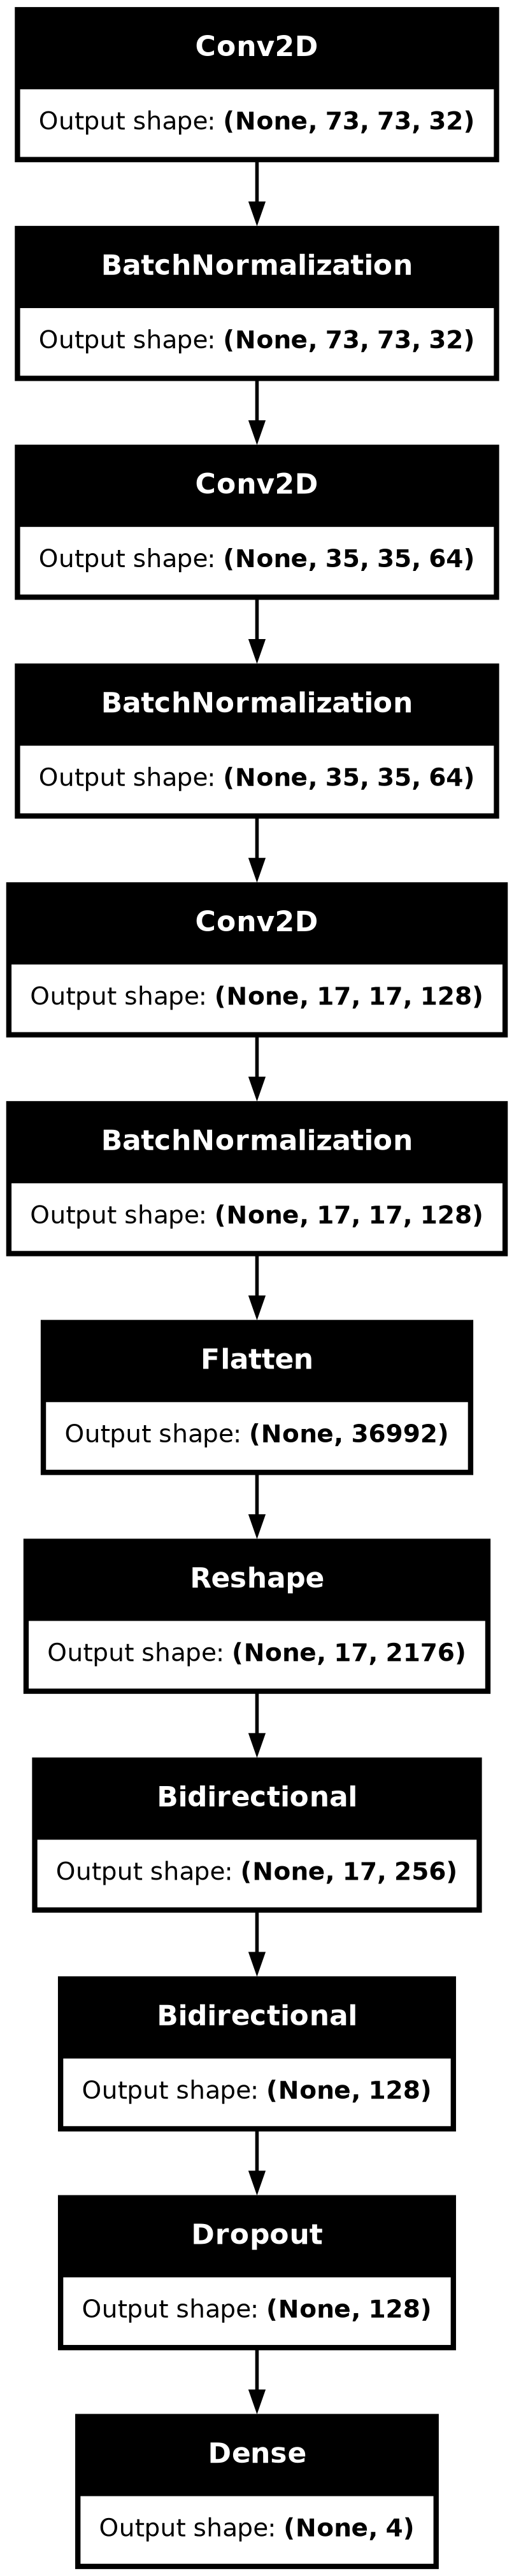

In [11]:
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
plot_model(bi_lstm_model, to_file='BiLstm_model.png', show_shapes=True)

In [12]:
bi_lstm_history = bi_lstm_model.fit(X_train, y_train,
                    epochs=50,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 163s 521ms/step - accuracy: 0.5311 - loss: 7.3845 - val_accuracy: 0.4693 - val_loss: 1.5239
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 149s 500ms/step - accuracy: 0.6627 - loss: 0.8799 - val_accuracy: 0.5555 - val_loss: 1.5569
Epoch 3/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 206s 515ms/step - accuracy: 0.7299 - loss: 0.8387 - val_accuracy: 0.6097 - val_loss: 1.2028
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 206s 528ms/step - accuracy: 0.8066 - loss: 0.7517 - val_accuracy: 0.8174 - val_loss: 0.6527
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 192s 496ms/step - accuracy: 0.8440 - loss: 0.6071 - val_accuracy: 0.8146 - val_loss: 0.6582
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 140s 469ms/step - accuracy: 0.8586 - loss: 0.5524 - val_accuracy: 0.7966 - val_loss: 0.7072
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 145s 480ms/step - accuracy: 0.8763 - loss: 0.5299 - val_accuracy: 0.7822 - val_loss: 0.7244
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 136s 457ms/step - accuracy: 0.8917 -

In [13]:
from sklearn.metrics import classification_report

# Make predictions on the validation data
y_pred = bi_lstm_model.predict(X_val)

# Convert predictions to labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_val, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

103/103 ━━━━━━━━━━━━━━━━━━━━ 17s 157ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1024
           1       0.99      0.95      0.97       922
           2       0.96      0.95      0.95       770
           3       0.92      0.95      0.94       553

    accuracy                           0.96      3269
   macro avg       0.96      0.96      0.96      3269
weighted avg       0.96      0.96      0.96      3269



In [14]:
bi_lstm_test_loss, bi_lstm_test_accuracy = bi_lstm_model.evaluate(X_test, y_test)
print(f"Bi_Lstm Test Accuracy: {bi_lstm_test_accuracy}, Test Loss: {bi_lstm_test_loss}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9640 - loss: 0.2868
Bi_Lstm Test Accuracy: 0.9621027112007141, Test Loss: 0.2972888648509979


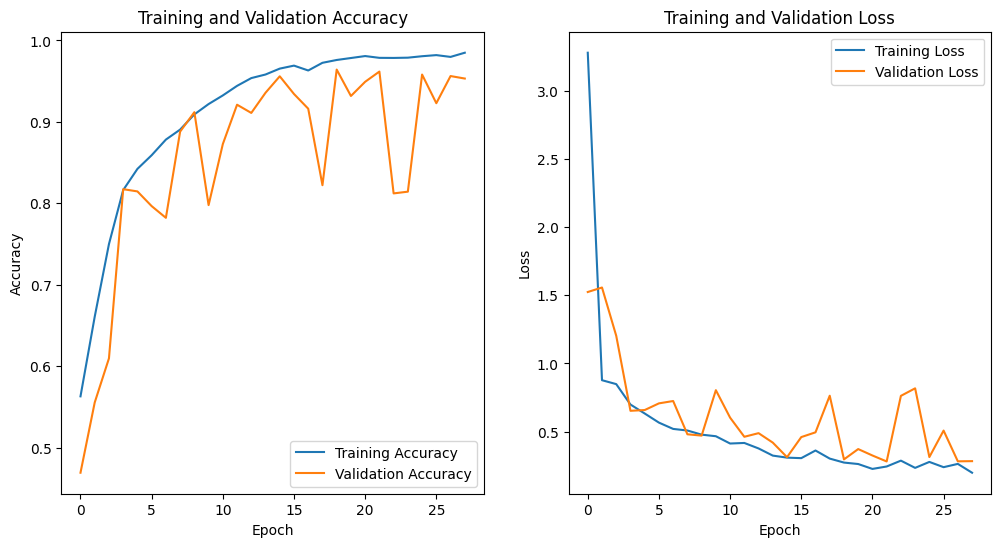

In [15]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(bi_lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(bi_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(bi_lstm_history.history['loss'], label='Training Loss')
plt.plot(bi_lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [18]:
bi_lstm_model.save('/kaggle/working/modelBiLstmImp.keras')